In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_actual =    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_predicted = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

In [3]:
y_actual = np.array(y_actual)
y_predicted = np.array(y_predicted)

In [4]:
conf_matrix = pd.crosstab(y_actual, y_predicted)
print(conf_matrix)

col_0  0  1
row_0      
0      5  2
1      1  4


In [5]:
conf_matrix.values 

array([[5, 2],
       [1, 4]])

In [6]:
def plot_confusion_matrix(actual, predicted, classes, title='Confusion Matrix', normalize=False, figsize=(8, 8),
                           dpi=72, cmap=plt.cm.binary):
    import pandas as pd
    
    if not normalize:
        conf_matrix = pd.crosstab(actual, predicted)  # confusion_matrix(actual, predicted)
    else:
        conf_matrix = pd.crosstab(actual, predicted).apply(lambda r: r / r.sum(), axis=1)
        
    #classes = ['c0', 'c1']
    #classes = ['c{}'.format(i) for i in range(n_classes)]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens # plt.cm.viridis
    plt.title(title, size=12)
    plt.colorbar(fraction=0.041, pad=0.05)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = 0.5
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i][j], fmt), 
                     ha="center", va="center", color="white" if conf_matrix[i][j] > thresh else "black")  #horizontalalignment
    
    '''
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
        horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")
    '''
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.grid(False)
    plt.tight_layout()
    return fig

In [7]:
class_name = ['c0', 'c1']
#class_name = ['c{}'.format(i) for i in range(n_classes)]

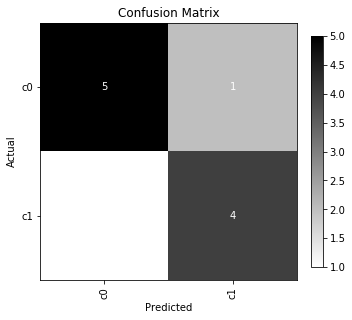

In [8]:
fig = plot_confusion_matrix(y_actual, y_predicted,classes=class_name, figsize=(5,5), cmap = plt.cm.binary)

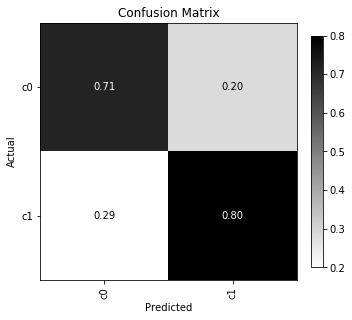

In [9]:
fig = plot_confusion_matrix(y_actual, y_predicted, classes=class_name, figsize=(5,5), cmap = plt.cm.binary, normalize=True)